In [37]:
#Importing packages and data

import pandas as pd
import numpy as np
from sklearn import linear_model, metrics, preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score

seeds = pd.read_csv('seeds_dataset.txt', delimiter='\t', header = None)
num_row, num_col = seeds.shape
seeds.head(10)

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


In [38]:
### Splitting train and test
train = seeds.sample(frac=0.8, random_state=25)
test = seeds.drop(train.index)
x_train = train.iloc[:, :-1]
y_train = train.iloc[:,-1:]

x_test = test.iloc[:, :-1] 
y_test = test.iloc[:,-1:] 

# y_train.describe()
# min_max scaling of the features
min_max_scaler = preprocessing.MinMaxScaler()
x_train_min_max = min_max_scaler.fit_transform(x_train)
x_test_min_max = min_max_scaler.fit_transform(x_test)

# encoding y with label encoder to avoid error generated by continous variables
lab = preprocessing.LabelEncoder()
y_train_encoded = lab.fit_transform(y_train)
y_test_encoded = lab.fit_transform(y_test)



/Users/shopup/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
#Running logistic regression with Saga solver
log_reg = LogisticRegression(solver='saga',penalty ='l1')
log_reg.fit(x_train_min_max,y_train_encoded)

print("Coeffient used by model: "+"\n", log_reg.coef_)
print("Bias used by model: "+"\n", log_reg.intercept_)

Coeffient used by model: 
 [[ 0.          0.          0.          0.          0.         -4.41550629
  -4.40500648]
 [ 2.59753394  0.07102575  0.          0.          1.89576751  0.
   4.23957713]
 [-4.02906406 -4.10316895  0.         -1.10741743 -4.31025242  0.14438513
   0.        ]]
Bias used by model: 
 [ 2.6308922  -5.92247366  3.29158146]


/Users/shopup/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [40]:
#predicting on test data
pred_test = log_reg.predict(x_test_min_max)

#rechecking the mode performance on training data
pred_train = log_reg.predict(x_train_min_max)

In [41]:
#checking the report of test data 

report = classification_report(y_test_encoded,pred_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       1.00      1.00      1.00        14
           2       0.90      1.00      0.95        18

    accuracy                           0.95        42
   macro avg       0.97      0.93      0.95        42
weighted avg       0.96      0.95      0.95        42



In [42]:
#finding confusion matrices
cm_train = confusion_matrix(y_train_encoded, pred_train)
print("Confusion Matrix for train dataset: ",cm_train)


cm_test = confusion_matrix(y_test_encoded,pred_test)
print("Confusion Matrix for test dataset: ",cm_test)

print("Accuracy score on test dataset:",accuracy_score(y_test_encoded,pred_test))

Confusion Matrix for train dataset:  [[56  2  2]
 [ 2 54  0]
 [ 2  0 50]]
Confusion Matrix for test dataset:  [[ 8  0  2]
 [ 0 14  0]
 [ 0  0 18]]
Accuracy score on test dataset: 0.9523809523809523


/Users/shopup/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


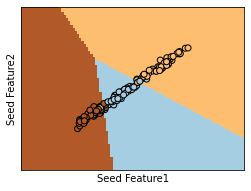

In [43]:
# finding decision boundary

## Taking first two features
X = x_train_min_max[:, :2]
logreg = LogisticRegression(solver='saga',penalty ='l1')
logreg.fit( X, y_train_encoded)


_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Seed Feature1",
    ylabel="Seed Feature2",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)


plt.xticks(())
plt.yticks(())

plt.show()